In [1]:
#https://github.com/datablogger-ml/Time-Series-Forecasting/blob/master/Time%20Series%20Forecasting.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab 
from pylab import *
pylab.rcParams['figure.figsize'] = (16, 6) # size for all figures
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#df = pd.read_csv(r'C:\Users\91783\Desktop\Results\YJ_Mean_Date_PM2.csv',parse_dates=True,index_col='Date')

In [3]:
#df = pd.read_csv(r'C:\Users\91783\Desktop\DataSet\1_Bhiwadi\Book_1_PM.csv')
df = pd.read_csv(r'C:\Users\91783\Desktop\subham\H_Ankl_1_2_19-3_12_22-_41_ (copy)_INDEX_Mean.csv')
df.head()
df['Date'] = pd.to_datetime(df['Date'])
df.head()

#y = pd.Series(data=df['PM2.5'].values, index=df['Date'])
#y.head()

,Date,PM25
0,2019-04-02 18:00:00,70.52
1,2019-04-02 19:00:00,61.39
2,2019-04-02 20:00:00,59.94
3,2019-04-02 21:00:00,76.44
4,2019-04-02 22:00:00,98.54


In [4]:
df = df.set_index('Date').asfreq('D')

In [5]:
df.columns = ['PM2.5']

In [6]:
print(f'The Daily data consists of values from {df.index.min()} to {df.index.max()}')

The Daily data consists of values from 2019-01-03 00:00:00 to 2022-12-11 00:00:00


In [7]:
#from pmdarima import auto_arima
filterwarnings('ignore')

In [8]:
# Finding the split point index to keep 1 month (30 days) data as test set
n_test = 61
train_data = df.iloc[:len(df) - n_test]
test_data = df.iloc[len(df) - n_test:]

In [9]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [10]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
model = ARIMA(train_data['PM2.5'],order=(1,2,3))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  PM2.5   No. Observations:                 1378
Model:                 ARIMA(1, 2, 3)   Log Likelihood               -6432.486
Date:                Sun, 22 Jan 2023   AIC                          12874.973
Time:                        15:58:25   BIC                          12901.108
Sample:                    01-03-2019   HQIC                         12884.751
                         - 10-11-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4683      0.065      7.177      0.000       0.340       0.596
ma.L1         -2.0526      0.070    -29.292      0.000      -2.190      -1.915
ma.L2          1.1451      0.133      8.593      0.000       0.884       1.406
ma.L3         -0.0925      0.063     -1.459      0.144      -0.217       0.032
sigma2       872.6002     19.995     43.641      0.000     833.411     911.789
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              1641.13
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                             1.27
Prob(H) (two-sided):                  0.05   Kurtosis:                         7.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
# Obtain predicted values on the test set
start = len(train_data)
end = len(train_data) + len(test_data) - 1
predictions = results.predict(start=start,end=end,dynamic=True,typ='levels').rename('ARIMA Predictions')

In [12]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted = {predictions[i]}, expected = {test_data['PM2.5'][i]}")

predicted = 67.3556000130568, expected = nan
predicted = 58.63935710844306, expected = 140.7
predicted = 54.54734722623946, expected = 32.4
predicted = 52.621082175388864, expected = 58.47126979
predicted = 51.70913682940634, expected = 154.82
predicted = 51.272244891742886, expected = 93.27
predicted = 51.05784270723366, expected = 84.22
predicted = 50.94764289111452, expected = 58.47126979
predicted = 50.88624592287564, expected = 87.93
predicted = 50.84770561325231, expected = 136.26
predicted = 50.81987014700922, expected = 82.27
predicted = 50.797048260122715, expected = 78.81
predicted = 50.776574467185085, expected = 193.99
predicted = 50.75720039658166, expected = 748.28
predicted = 50.73834137743643, expected = 193.32
predicted = 50.71972358100382, expected = 118.12
predicted = 50.7012187604616, expected = 73.58
predicted = 50.68276685181839, expected = 152.98
predicted = 50.66433972429482, expected = 131.19
predicted = 50.64592420292984, expected = 71.77
predicted = 50.627514

In [13]:
compare = pd.DataFrame(columns=['Actual','Predicted'])
compare['Actual'] = test_data['PM2.5']
compare['Predicted'] = predictions
compare.head()

,Actual,Predicted
Date,,
2022-10-12,NaN,67.355600
2022-10-13,140.70000,58.639357
2022-10-14,32.40000,54.547347
2022-10-15,58.47127,52.621082
2022-10-16,154.82000,51.709137


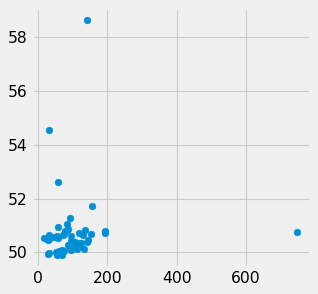

In [14]:
plt.figure(figsize=(4,4),dpi=80)
#plt.plot(legend=True,figsize=(4, 4))
plt.scatter(test_data,predictions)
plt.show()

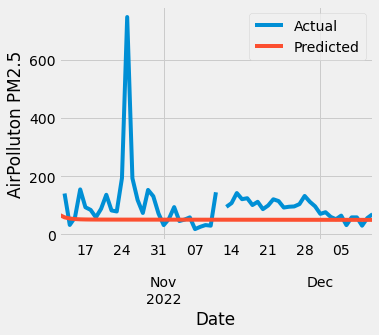

In [15]:
compare.plot(legend=True,figsize=(5, 4))
plt.ylabel('AirPolluton PM2.5')
plt.show()

In [16]:
#Evaluate the Model
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(f"ARIMA MAE : {mean_absolute_error(compare['Actual'],compare['Predicted'])}")
print(f"ARIMA MSE : {mean_squared_error(compare['Actual'],compare['Predicted'])}")

ValueError: Input contains NaN.

In [ ]:
rmse = np.mean((compare['Predicted']- compare['Actual'])**2)**.5  # RMSE
print('RMSE')
print(rmse)


In [ ]:
#mpe = np.mean((compare['Predicted']- compare['Actual'])/compare['Actual'])   # MPE
#print('MPE')
#print(mpe)
#me = np.mean(compare['Predicted']- compare['Actual'])
#print('ME')
#print(me)

In [20]:
#mape = np.mean(np.abs(compare['Predicted']- compare['Actual'])/np.abs(compare['Actual']))
#print('MAPE')
#print(mape)

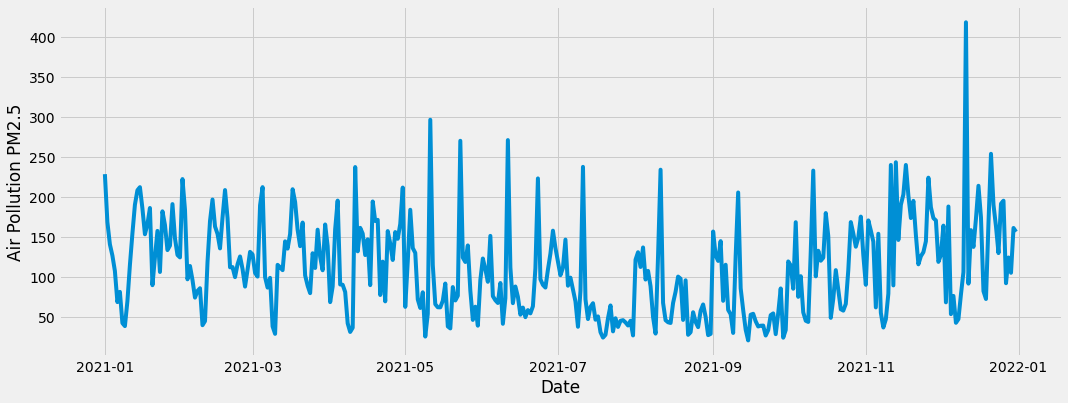

In [21]:
plt.xlabel("Date")
plt.ylabel("Air Pollution PM2.5")
plt.plot(df)

In [22]:
import matplotlib.pyplot as plt

In [23]:
a=pd.DataFrame(predictions)

In [24]:
b=pd.DataFrame(test_data)

In [25]:
a1=a.set_axis(['a'],axis=1,inplace=False)

In [26]:
print(a1)

                     a
2021-11-01  108.301578
2021-11-02  105.327004
2021-11-03  105.774698
2021-11-04  107.176835
2021-11-05  108.845157
...                ...
2021-12-27  200.911423
2021-12-28  202.682694
2021-12-29  204.453965
2021-12-30  206.225236
2021-12-31  207.996506

[61 rows x 1 columns]


In [27]:
a

,ARIMA Predictions
2021-11-01,108.301578
2021-11-02,105.327004
2021-11-03,105.774698
2021-11-04,107.176835
2021-11-05,108.845157
...,...
2021-12-27,200.911423
2021-12-28,202.682694
2021-12-29,204.453965
2021-12-30,206.225236


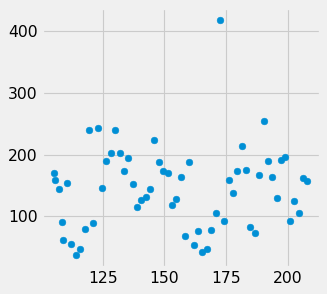

In [28]:
plt.figure(figsize=(4,4),dpi=80)
plt.scatter(a1,b)
plt.show()

In [29]:
print(b)

             PM2.5
Date              
2021-11-01   90.12
2021-11-02  170.65
2021-11-03  157.98
2021-11-04  144.02
2021-11-05   61.85
...            ...
2021-12-27   92.11
2021-12-28  124.25
2021-12-29  105.15
2021-12-30  161.22
2021-12-31  156.41

[61 rows x 1 columns]


<AxesSubplot:xlabel='a', ylabel='PM2.5'>

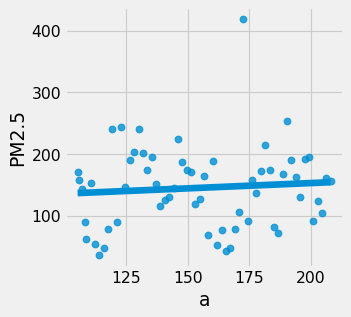

In [30]:
import seaborn as sb
plt.figure(figsize=(4,4),dpi=80)
sb.regplot(a1,b,ci=None)